# Regressions

In [57]:
# import packages you will be using in this lab

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


### Linear Regression




Now that you have learned how linear regression works, let’s try it on an example of real-world data.

Imagine yourself working ss a data analysit for a computer manufacturing company. You are given a dataset on computer sales for each quarter beteen the year 2015 to 2019. The company is relying on you to tell whether the sales is going up, going down, or stayed the same. The company also would like you to predict its sales in 2025. 

The dataset computersales.csv can be download from Canvas.



In [58]:
# Create dataframes computer_df from the data and explore the data
# Print out the dataframe to visually inspect the data
# try other data exploration methods to explore the data

computer_df = pd.read_csv('computersales.csv')

print(computer_df.head())
print(computer_df.dtypes)
print(computer_df.count())


   year  quarter  sales
0  2015        1   4009
1  2015        2   4321
2  2015        3   4224
3  2015        4   3944
4  2016        5   4123
year       int64
quarter    int64
sales      int64
dtype: object
year       20
quarter    20
sales      20
dtype: int64


In [105]:
# For now, we care about the total sales of honey per year. 
# Use the .groupby() method provided by pandas to get the sum of totalsales per year using .sum() function.
# Store this in a variable called sales_per_year.
# Print the total sales for each year

sales_per_year=computer_df.groupby(['year'])['sales'].sum()
print(sales_per_year)

year
2015    16498
2016    17332
2017    18335
2018    18069
2019    18263
Name: sales, dtype: int64


In [109]:
# Create a variable called X that is the column of years in this sales_per_year DataFrame.
# After creating X, dont' forget to reshape it to get it into the right format, using .reshape(-1, 1)
# Create a variable called y that is the sales column in the sales_per_year data frame.
# print X and y to check on our work.
x=computer_df.year.to_numpy().reshape(-1,1)
y=computer_df.sales.to_numpy()
print(x,y)


[[2015]
 [2015]
 [2015]
 [2015]
 [2016]
 [2016]
 [2016]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2018]
 [2018]
 [2018]
 [2018]
 [2019]
 [2019]
 [2019]
 [2019]] [4009 4321 4224 3944 4123 4522 4657 4030 4493 4806 4551 4485 4595 4799
 4417 4258 4245 4900 4585 4533]


Text(0, 0.5, 'Sales')

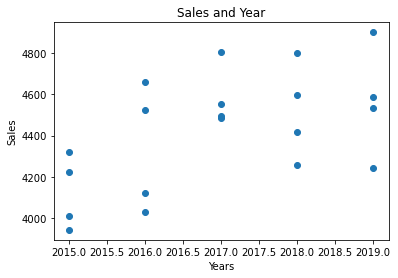

In [110]:
# Using plt.scatter(), plot y vs X as a scatterplot.
# Put appropriate lables on X-axis and Y-axis
# Display the plot to see whether there is linear relationship between the variables.

plt.scatter(x,y)
plt.title("Sales and Year")
plt.xlabel("Years")
plt.ylabel("Sales")

In [126]:
# Create a linear regression model computer_regr.
# Fit the model to the data by using .fit(). 
# Print out the slope of the line and the intercept of the line.
# Computer a store predictions from computer_reg and store it in a list called y_predict.
# Print out y_predict to check your results.
# Calculate and print out R-squre


computer_regr=LinearRegression()
computer_regr.fit(x,y)

print("\nCoefficent Estimate (beta -1)", computer_regr.coef_)
print('\nIntercept (beta-0)', computer_regr.intercept_)
print("\nR-square is:", computer_regr.score(x,y,sample_weight=None))


Coefficent Estimate (beta -1) [106.675]

Intercept (beta-0) -210738.62500000003

R-square is: 0.31889473229014553


In [127]:
# Plot y_predict vs X as a line, on top of your scatterplot.

y_predicted=computer_regr.predict(x)


#plot the line in the same scatter plot




In [128]:
# Is sales increasing, decreasing, or stay the same?
# Following this trend, how would the sales of 2025 be like?
# Create a NumPy array called X_future that is the range from 2020 to 2025. Don't forget to reshape it.
# Create a list called future_predict to store predictions for the values of X_future.
# Print out the list to check your answer



Text(0, 0.5, 'Sales')

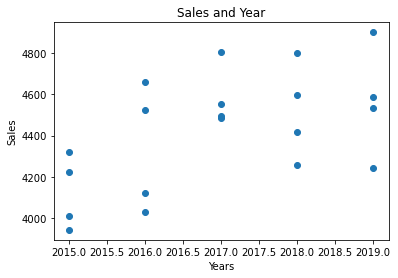

In [129]:
# Plot future_predict vs X_future on a different plot.
# Can you predict what is the sales of 2015 will be?

plt.scatter(x,y)
plt.title("Sales and Year")
plt.xlabel("Years")
plt.ylabel("Sales")


Use your words to interpret your results:



Lessons learned through this exercise:




## Multiple Linear Regression



In [69]:
# load the data to dataframe housing_df
# display column/variable names
# review first 5 records in the data
# try other ways to explore the data
housing_df = pd.read_csv('bostonhousing.csv')

print(housing_df.head())
print(housing_df.dtypes)
print(housing_df.count())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  
CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object
CRIM         506
ZN           506
INDUS    

In [70]:
# select columns for regression analysis
# store predictors in X
# store outcome variables in Y


outcome='MEDV'
predictors=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO']
x=housing_df[predictors]
y=housing_df[outcome]

In [71]:
# partition data into training set (80%) and test set (20%)
# name training set X_training, y_training
# name testing set X_test, y_test
# print out each partitioned sub-set to check on your work

x_training, x_test, y_training, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

print('\nTraining Set;', x_training.head(), '\nTest set:', x_test.head())



Training Set;          CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
42    0.14150   0.0   6.91     0  0.448  6.169   6.6  5.7209    3  233   
58    0.15445  25.0   5.13     0  0.453  6.145  29.2  7.8148    8  284   
385  16.81180   0.0  18.10     0  0.700  5.277  98.1  1.4261   24  666   
78    0.05646   0.0  12.83     0  0.437  6.232  53.7  5.0141    5  398   
424   8.79212   0.0  18.10     0  0.584  5.565  70.6  2.0635   24  666   

     PTRATIO  
42      17.9  
58      19.7  
385     20.2  
78      18.7  
424     20.2   
Test set:         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO
307  0.04932  33.0   2.18     0  0.472  6.849  70.3  3.1827    7  222     18.4
343  0.02543  55.0   3.78     0  0.484  6.696  56.4  5.7321    5  370     17.6
47   0.22927   0.0   6.91     0  0.448  6.030  85.5  5.6894    3  233     17.9
67   0.05789  12.5   6.07     0  0.409  5.878  21.4  6.4980    4  345     18.9
362  3.67822   0.0  18.10     0  0.770  5.36

In [72]:
# build regression model
# fit the regression model 
# print coefficients

housing_mlr=LinearRegression()
housing_mlr.fit(x_training, y_training)

print('Intercept', housing_mlr.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'Coefficient':housing_mlr.coef_}))

Intercept 32.413269323962666
   Predictor  Coefficient
0       CRIM    -0.181669
1         ZN     0.048574
2      INDUS    -0.048790
3       CHAS     2.801452
4        NOX   -23.982096
5         RM     5.469627
6        AGE    -0.050281
7        DIS    -1.669890
8        RAD     0.242483
9        TAX    -0.010245
10   PTRATIO    -1.022074


In [79]:
# validate your model on the testing dataset
# print out the results

y_predicted=housing_mlr.predict(x_test)
print(y_predicted[:5])

[31.81003937 26.93835459 20.51779531 21.24665585 11.7242812 ]


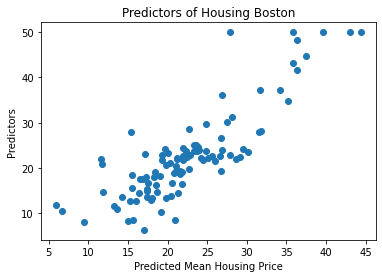

In [78]:
# Plot your predicted value against the actual value in the testing dataset
# lable the x-axis and y-axis accordingly, do not forget to show your results
plt.scatter(y_predicted,y_test)
plt.title("Predictors of Housing Boston")
plt.xlabel("Predicted Mean Housing Price")
plt.ylabel("Predictors")

plt.show()

In [75]:
# print R-square
print(housing_mlr.score(x_test,y_test))
print(housing_mlr.score(x_training,y_training))

0.7012050458350929
0.6565863215699673


Use your words to interpret your results:



Lessons learned through this exercise:





In [80]:
# There is a postive linear relationship between the predictors and the median house price in Boston. The R Square values support this as well. 
# Extra Credit (10 points): Find out the best model from the 12 predictors in this dataset to predict MEDV
# pay attention to multicollinearity 
# Wouldn't NOX: Nitric oxide concentration (parts per 10 millin) be the biggest indicator of lower housing values?

## Logistic Regression

The file banks.csv includes data on a sample of 20 banks. The "Financial Condition" column records the judgement of an expert on the financial condition of each bank. This outcome variable takes one of two possible values -- weak or strong-- according to the financial condition of the bank. The predictors are two ratios used in the financial analysis of banks: TotLnsLses_Assets is the ratio of total loans and leases to total assets and TotExp_Assets is the ratio of total expenses to total assets. The target is to use the two ratios for classifying the financial condition of a new bank.

Run a logistic regression model (on the entire dataset) that model the status of a bank as a function of the two financial measures provided. Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.

In [81]:
# load the data to data frame banks_df
# display column/variable names
# review first 5 records in the data

banks_df = pd.read_csv("banks.csv")

print(banks_df.head())
print(banks_df.count())



   Obs  Financial_Condition  TotCap_Assets  TotExp_Assets  TotLnsLses_Assets
0    1                    1            9.7           0.12               0.65
1    2                    1            1.0           0.11               0.62
2    3                    1            6.9           0.09               1.02
3    4                    1            5.8           0.10               0.67
4    5                    1            4.3           0.11               0.69
Obs                    20
Financial_Condition    20
TotCap_Assets          20
TotExp_Assets          20
TotLnsLses_Assets      20
dtype: int64


In [82]:
# Is the data clean?
# Select the predictors to X, outcome variable to y

x=banks_df[["TotLnsLses_Assets","TotExp_Assets"]]
y=banks_df["Financial_Condition"]

In [83]:
# partition data into training set (60%) and test set (40%)
# name training set X_training, y_training
# name testing set X_test, y_test
# print out each partitioned sub-set to check on your work

x_training, x_test, y_training, y_test=train_test_split(x, y, test_size=0.4, random_state=5)

print(x_test,y_test)

    TotLnsLses_Assets  TotExp_Assets
2                1.02           0.09
5                0.74           0.13
17               0.55           0.11
19               0.51           0.08
12               0.69           0.07
1                0.62           0.11
11               0.80           0.12
10               0.43           0.08 2     1
5     1
17    0
19    0
12    0
1     1
11    0
10    0
Name: Financial_Condition, dtype: int64


In [84]:
# Scale the predictor datasets so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()

x_training=pd.DataFrame(scaler.fit_transform(x_training), index = x_training.index, columns = x_training.columns)
print(x_training)


x_test=pd.DataFrame(scaler.fit_transform(x_test), index = x_test.index, columns = x_test.columns)
print(x_test)

    TotLnsLses_Assets  TotExp_Assets
13          -0.526389      -1.025139
18          -1.195213      -1.025139
7            0.216748       0.783929
4            0.662631       0.060302
8            0.885572       1.869370
9           -0.229134       1.869370
0            0.365376       0.422116
16          -0.823644      -1.025139
6            1.405768      -0.301511
15          -2.235605      -0.663325
14           0.959886      -0.663325
3            0.514003      -0.301511
    TotLnsLses_Assets  TotExp_Assets
2            2.000817      -0.431638
5            0.400163       1.541566
17          -0.685994       0.554964
19          -0.914659      -0.924940
12           0.114332      -1.418241
1           -0.285831       0.554964
11           0.743161       1.048265
10          -1.371989      -0.924940


In [87]:
# Create and train the model
# fit the model

Financial_Condition_lr=LogisticRegression()
Financial_Condition_lr.fit(x_training, y_training)




LogisticRegression()

In [88]:
# Analyze the coefficients
print('Intercept', Financial_Condition_lr.intercept_)
print(list(zip(['TotLnsLses_Assets','TotExp_Assets'], Financial_Condition_lr.coef_[0])))

Intercept [0.50947949]
[('TotLnsLses_Assets', 0.8384044295309269), ('TotExp_Assets', 1.2641532927117796)]


In [89]:
# Make predictions on test data

Company1 = np.array([0.0,0.0])
Company2 = np.array([11.0,18.0])


sample_company=np.array([Company1,Company2])
sample_company=scaler.fit_transform(sample_company)



print(Financial_Condition_lr.predict(sample_company))
print(Financial_Condition_lr.predict_proba(sample_company))


[0 1]
[[0.83104875 0.16895125]
 [0.06836773 0.93163227]]


In [90]:
# Score the model
print(Financial_Condition_lr.score(x_training, y_training))

print(Financial_Condition_lr.score(x_test, y_test))



0.9166666666666666
0.75


Use your words to interpret your results:



Lessons learned through this exercise:





In [91]:
# TotLnsLses_Assets and TotExp_Assets (logged) can be used to predict the "Financial Condition" of a company.
# The score and R value support this statement.